In [ ]:
# Per condition that is not null trial, fit a Weilbull function; weighted by trials

# From this function we take the 0.75 detection probability

# See per condition compared to target


===== BASIC INFO =====
<class 'pandas.core.frame.DataFrame'>
Index: 1430 entries, 0 to 1459
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        1430 non-null   int64  
 1   trial     1430 non-null   int64  
 2   label     1430 non-null   object 
 3   FC        1430 non-null   float64
 4   TC        1430 non-null   float64
 5   response  1430 non-null   int64  
 6   RT        1430 non-null   float64
dtypes: float64(3), int64(3), object(1)
memory usage: 89.4+ KB
None

===== FIRST ROWS =====
    id  trial                     label        FC        TC  response  \
0  310      0   triple_flanker_100_null  0.097587  0.146381         1   
1  310      1    single_flanker_top_300  0.292761  0.146381         0   
2  310      2   triple_flanker_orth_150  0.146381  0.146381         1   
3  310      3   single_flanker_top_3200  3.122787  0.146381         1   
4  310      4  triple_flanker_6400_null  6.245574  0.146381        

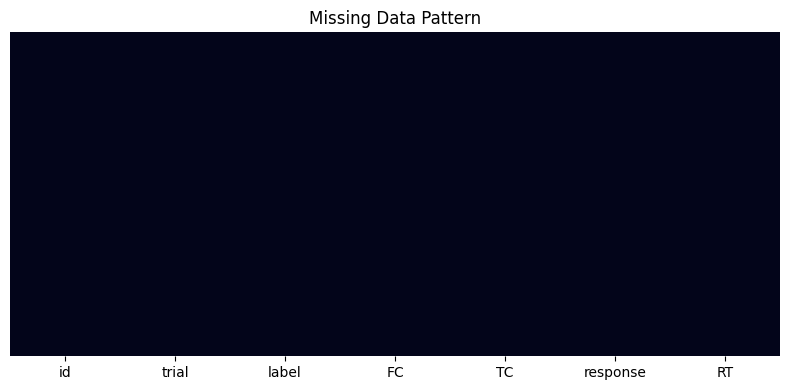


===== SUMMARY STATISTICS =====
            id        trial                    label           FC  \
count   1430.0  1430.000000                     1430  1430.000000   
unique     NaN          NaN                       58          NaN   
top        NaN          NaN  triple_flanker_orth_300          NaN   
freq       NaN          NaN                       42          NaN   
mean     310.0   728.496503                      NaN     1.686107   
std        0.0   421.323875                      NaN     2.071255   
min      310.0     0.000000                      NaN     0.000000   
25%      310.0   362.250000                      NaN     0.146381   
50%      310.0   729.500000                      NaN     0.780697   
75%      310.0  1089.750000                      NaN     3.122787   
max      310.0  1459.000000                      NaN     6.245574   

                 TC     response           RT  
count   1430.000000  1430.000000  1430.000000  
unique          NaN          NaN          N

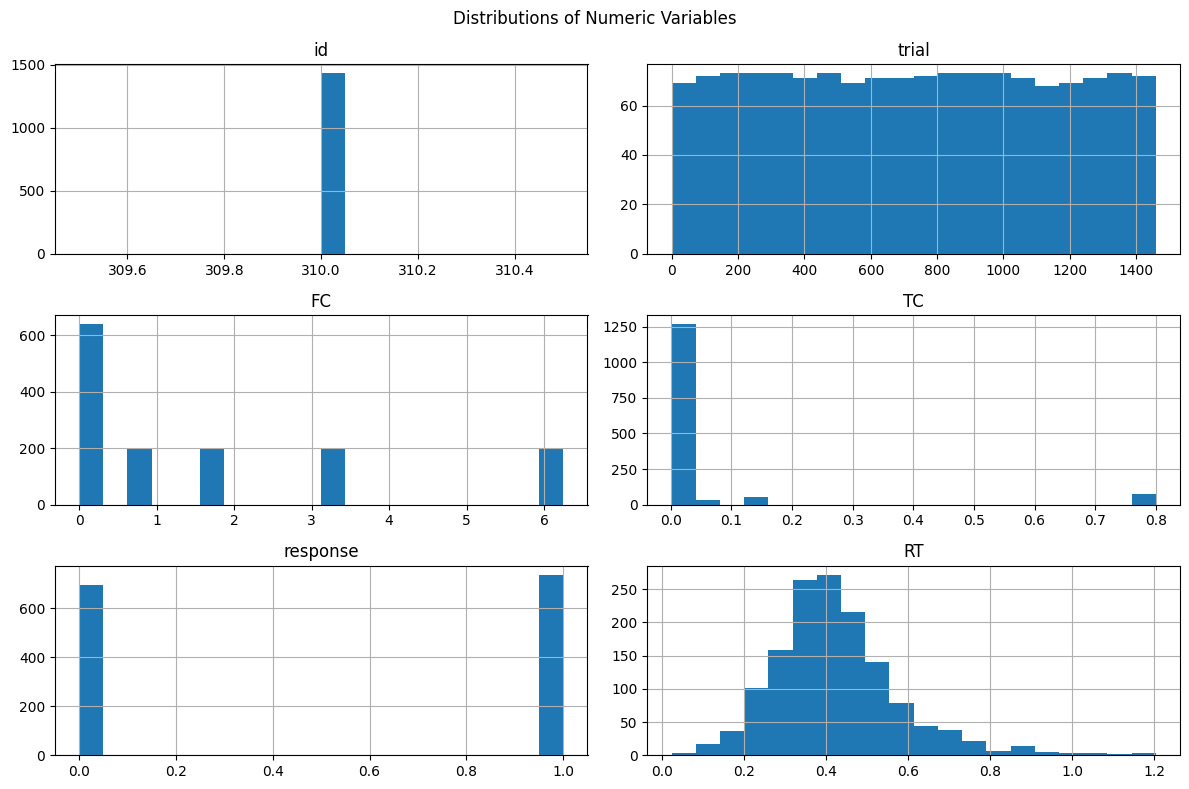


===== VALUE COUNTS: label =====
label
triple_flanker_orth_300          42
triple_flanker_300               41
triple_flanker_orth_1600         39
triple_flanker_6400              39
single_flanker_side_100          39
single_flanker_top_6400          39
single_flanker_side_800          39
triple_flanker_orth_800          39
triple_flanker_3200              38
single_flanker_side_1600         38
triple_flanker_orth_100          38
target                           38
triple_flanker_800               38
triple_flanker_100               37
triple_flanker_150               37
single_flanker_side_150          36
triple_flanker_orth_6400         36
single_flanker_top_1600          36
single_flanker_top_800           35
single_flanker_top_150           34
single_flanker_top_3200          34
single_flanker_side_6400         33
triple_flanker_orth_150          33
single_flanker_top_100           33
single_flanker_side_300          33
triple_flanker_1600              32
single_flanker_side_3200 

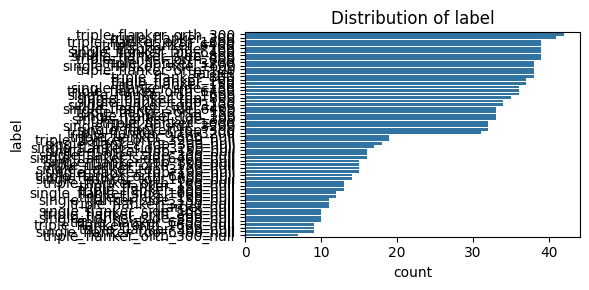

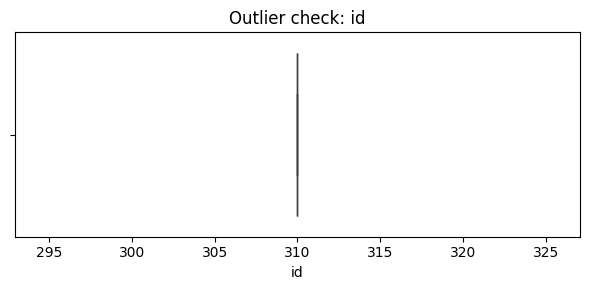

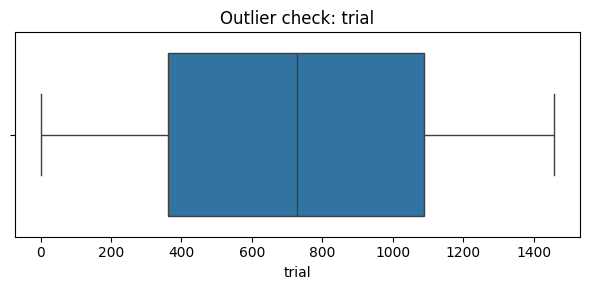

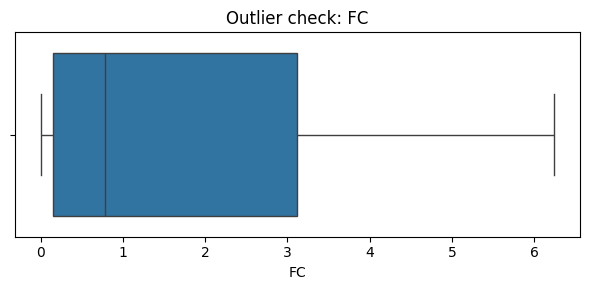

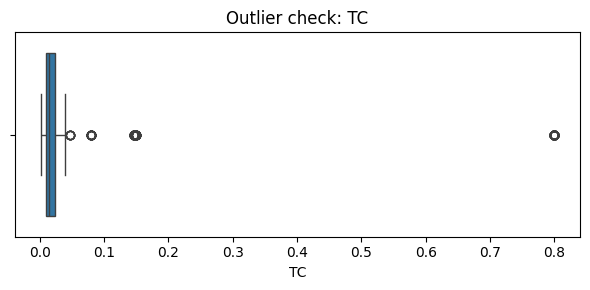

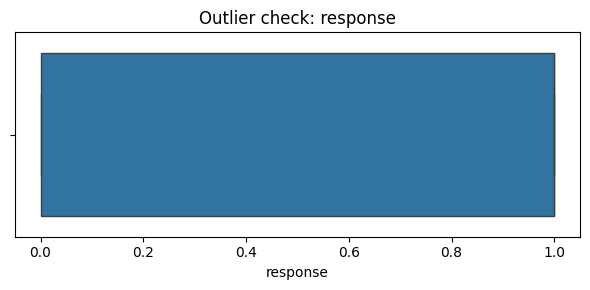

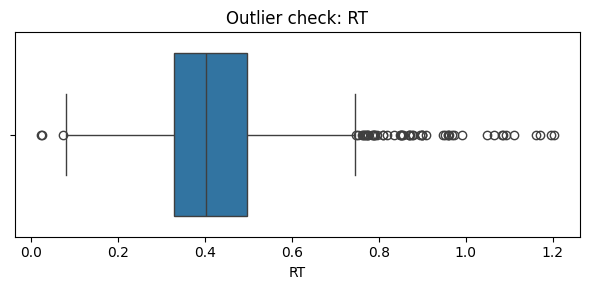

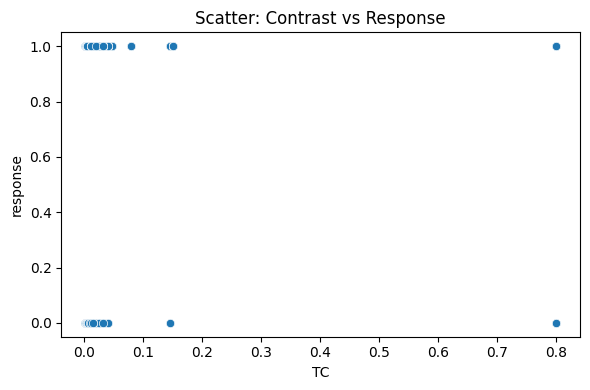

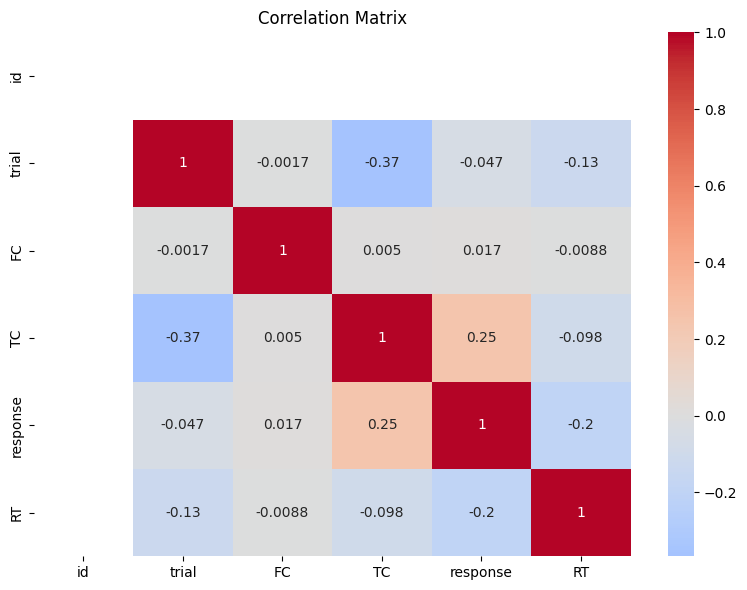

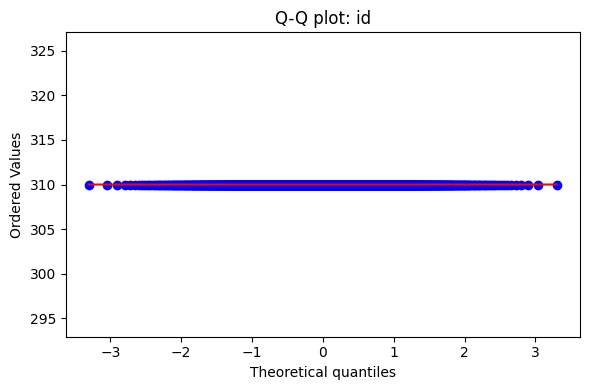

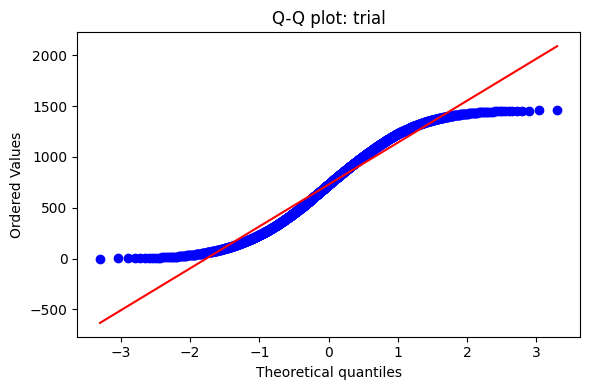

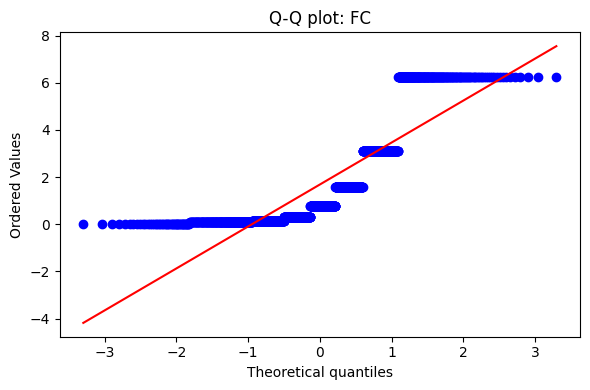

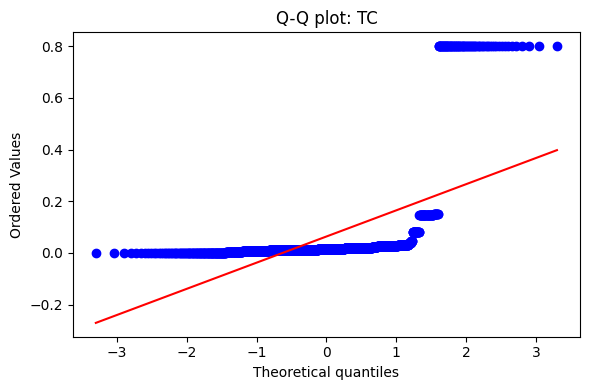

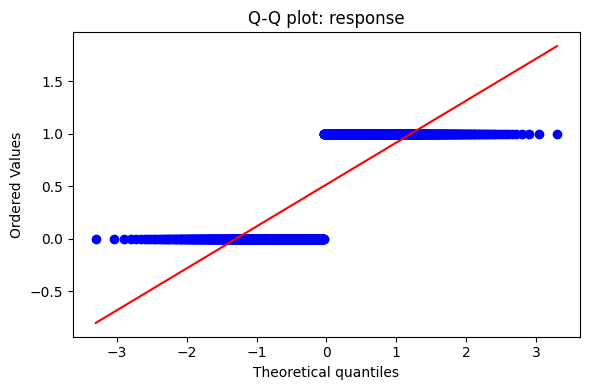

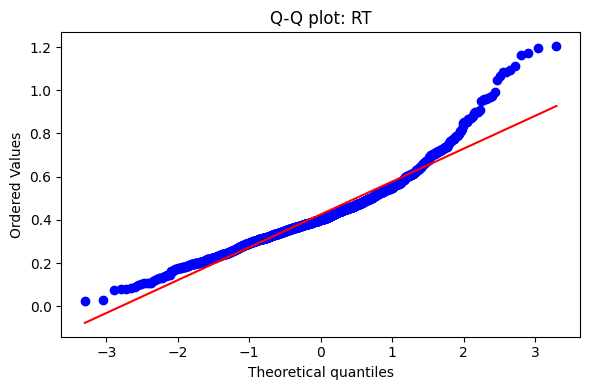

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
# =========================
# 1. LOAD DATA
# =========================
# Example: load from CSV or directly use your DataFrame
# df = pd.read_csv("Output/mydata.csv")
# Or if already loaded:
# df = myDataFrame
participant_num = "310"

input_csv = f"/Users/wouter/Documents/phd/projects/psychophysics/experiments/dipperV2/analysis/{participant_num}_main.csv"
output_dir = f"./Output/Exp3/Baseline/{participant_num}_plots/"
detection_prob = 0.5   # threshold

os.makedirs(output_dir, exist_ok=True)

# ------------------------------
# Load data
# ------------------------------
df = pd.read_csv(input_csv)

# Remove extremely long RTs
df = df[df["RT"] <= 90]

# ------------------------------
# Fit psychometric curves
# ------------------------------
unique_labels = df['label'].unique()
print("\n===== BASIC INFO =====")
print(df.info())
print("\n===== FIRST ROWS =====")
print(df.head())

# =========================
# 2. MISSING DATA CHECK
# =========================
print("\n===== MISSING DATA =====")
print(df.isna().sum())
print(f"\nTotal missing values: {df.isna().sum().sum()}")

plt.figure(figsize=(8, 4))
sns.heatmap(df.isna(), cbar=False, yticklabels=False)
plt.title("Missing Data Pattern")
plt.tight_layout()
plt.show()

# =========================
# 3. DESCRIPTIVE STATISTICS
# =========================
print("\n===== SUMMARY STATISTICS =====")
print(df.describe(include='all'))

# Histograms for numeric columns
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols].hist(bins=20, figsize=(12, 8))
plt.suptitle("Distributions of Numeric Variables")
plt.tight_layout()
plt.show()

# =========================
# 4. VALUE COUNTS / CATEGORY BALANCE
# =========================
cat_cols = df.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    print(f"\n===== VALUE COUNTS: {col} =====")
    print(df[col].value_counts())

    plt.figure(figsize=(6, 3))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

# =========================
# 5. OUTLIERS (NUMERIC)
# =========================
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f"Outlier check: {col}")
    plt.tight_layout()
    plt.show()

# =========================
# 6. RELATIONSHIPS
# =========================
# Example: psychometric variable relationships
if {'TC', 'response'}.issubset(df.columns):
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x='TC', y='response', data=df)
    plt.title("Scatter: Contrast vs Response")
    plt.tight_layout()
    plt.show()

# Correlation matrix
if len(num_cols) > 1:
    plt.figure(figsize=(8, 6))
    corr = df[num_cols].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
    plt.title("Correlation Matrix")
    plt.tight_layout()
    plt.show()

# =========================
# 7. PARTICIPANT / CONDITION OVERVIEW
# =========================
if {'participant', 'condition'}.issubset(df.columns):
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x='participant', hue='condition')
    plt.title("Trials per Participant × Condition")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# =========================
# 8. NORMALITY CHECKS (optional)
# =========================
for col in num_cols:
    plt.figure(figsize=(6, 4))
    stats.probplot(df[col].dropna(), dist="norm", plot=plt)
    plt.title(f"Q-Q plot: {col}")
    plt.tight_layout()
    plt.show()

In [ ]:
print(df.head())
print(unique_labels)

mean_contrast_per_label = df.groupby('label')['TC'].mean()

# Optional: check the result
print(mean_contrast_per_label)

# 2️⃣ Plot histogram of mean contrasts
plt.figure(figsize=(6,4))
plt.hist(mean_contrast_per_label, bins=10, edgecolor='black')
plt.xlabel('Mean target contrast')
plt.ylabel('Number of labels')
plt.title('Histogram of mean target contrast per label')
plt.show()


    id  trial                     label        FC        TC  response  \
0  310      0   triple_flanker_100_null  0.097587  0.146381         1   
1  310      1    single_flanker_top_300  0.292761  0.146381         0   
2  310      2   triple_flanker_orth_150  0.146381  0.146381         1   
3  310      3   single_flanker_top_3200  3.122787  0.146381         1   
4  310      4  triple_flanker_6400_null  6.245574  0.146381         1   

         RT  
0  0.390450  
1  0.390263  
2  0.212453  
3  0.204655  
4  0.197590  
['triple_flanker_100_null' 'single_flanker_top_300'
 'triple_flanker_orth_150' 'single_flanker_top_3200'
 'triple_flanker_6400_null' 'single_flanker_side_800_null'
 'triple_flanker_3200_null' 'target' 'single_flanker_top_150'
 'triple_flanker_orth_100' 'single_flanker_side_1600'
 'single_flanker_top_6400_null' 'triple_flanker_orth_800'
 'single_flanker_side_150_null' 'triple_flanker_orth_300'
 'triple_flanker_800_null' 'single_flanker_top_100'
 'triple_flanker_300_null' 's

ValueError: could not convert string to float: 'null'